In [1]:
import pandas as pd

In [34]:
df_small= pd.read_csv("~/Documents/Data/FracFocus/full_df.csv", nrows=100)

In [48]:
df_types = df_small.dtypes.apply(lambda x : x.name).to_dict()
df_types['ClaimantCompany']='object'
df_types['IngredientComment']='object'

In [49]:
df_types = {c: (t if t !='object' else 'str') for c,t in df_types.items()}
#df_types['date']= 'datetime64[ns]'
df_types.pop('date')

'str'

In [44]:
df_small['date']

0     1955-05-01
1     1982-05-19
2     1982-05-19
3     1995-02-07
4     1995-02-07
         ...    
95    2010-02-10
96    2010-02-10
97    2010-02-11
98    2010-02-11
99    2010-02-12
Name: date, Length: 100, dtype: object

In [45]:
def my_date_parser(d):
    return pd.datetime.strptime(d, "%Y-%m-%d")

my_date_parser(df_small['date'][0])

datetime.datetime(1955, 5, 1, 0, 0)

In [50]:
df= pd.read_csv("~/Documents/Data/FracFocus/full_df.csv", dtype=df_types,parse_dates=['date'], date_parser=my_date_parser)

In [51]:
df.dtypes.apply(lambda x : x.name).to_dict()

{'Unnamed: 0': 'int64',
 'APINumber': 'int64',
 'CASNumber': 'object',
 'ClaimantCompany': 'object',
 'CountyName': 'object',
 'CountyNumber': 'int64',
 'DTMOD': 'float64',
 'DisclosureKey': 'object',
 'FFVersion': 'int64',
 'FederalWell': 'bool',
 'IndianWell': 'bool',
 'IngredientComment': 'object',
 'IngredientKey': 'object',
 'IngredientMSDS': 'bool',
 'IngredientName': 'object',
 'IsWater': 'float64',
 'JobEndDate': 'object',
 'JobStartDate': 'object',
 'Latitude': 'float64',
 'Longitude': 'float64',
 'MassIngredient': 'float64',
 'OperatorName': 'object',
 'PercentHFJob': 'float64',
 'PercentHighAdditive': 'float64',
 'Projection': 'object',
 'Purpose': 'object',
 'PurposeIngredientMSDS': 'float64',
 'PurposeKey': 'object',
 'PurposePercentHFJob': 'float64',
 'Source': 'float64',
 'StateName': 'object',
 'StateNumber': 'int64',
 'Supplier': 'object',
 'SystemApproach': 'float64',
 'TVD': 'float64',
 'TotalBaseNonWaterVolume': 'float64',
 'TotalBaseWaterVolume': 'float64',
 'Trade

In [57]:
df.date.dt.month

0          5
1          5
2          5
3          2
4          2
          ..
4409418    5
4409419    6
4409420    6
4409421    4
4409422    4
Name: date, Length: 4409423, dtype: int64

In [55]:
df['year']= df.date.dt.year

In [75]:
df= df.loc[~df.UploadKey.duplicated(keep='last')]

In [87]:
gb =df.groupby(['year'],as_index=False)['CASNumber'].count()

In [91]:
gb=gb.loc[(gb['year']>2010) & (gb['year']<2020)]

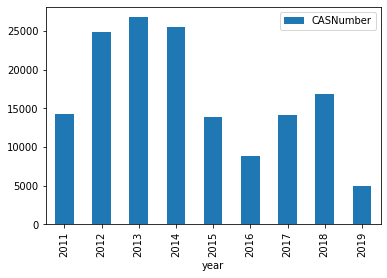

In [92]:
ax=gb.plot.bar('year','CASNumber')

In [62]:
gbT =df.groupby(['UploadKey'],as_index=False)['CASNumber'].count()

In [64]:
df_dedup = df.loc[~df.UploadKey.duplicated(keep='last')]

In [71]:
tmp=df_dedup.groupby('year')['UploadKey'].count()
tmp

year
1955        1
1982        1
1995        1
1996        1
2001        1
2008        2
2009       24
2010      204
2011    14303
2012    24920
2013    27952
2014    28780
2015    17310
2016    10007
2017    14175
2018    16844
2019     4997
2020        1
2021        2
Name: UploadKey, dtype: int64

In [72]:
tmp2=df.groupby('year')['UploadKey'].count()
tmp2

year
1955          1
1982          2
1995          2
1996          2
2001          2
2008          4
2009         72
2010        657
2011      34978
2012     105445
2013     818079
2014    1077937
2015     635704
2016     374340
2017     565600
2018     619275
2019     177317
2020          2
2021          4
Name: UploadKey, dtype: int64